In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns 
from scipy import stats 
import urllib 

In [3]:
# csv file read/load
df = pd.read_csv('D:\\AB_NYC_2019.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [31]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,0.0,0.0
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,NaN,NaN
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,NaN,NaN
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,NaN,NaN
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,NaN,NaN
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,NaN,NaN
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,NaN,NaN
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,NaN,NaN


In [32]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
Unnamed: 16                       48895
Unnamed: 17                       48895
dtype: int64

In [5]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.fillna({'name':"NoName"}, inplace=True)
df.fillna({'host_name':"NoName"}, inplace=True)
df.fillna({'last_review':"NotReviewed"}, inplace=True)
df.fillna({'Unnamed: 16':0}, inplace=True)
df.fillna({'Unnamed: 17':0}, inplace=True)

In [6]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Unnamed: 16                       0
Unnamed: 17                       0
dtype: int64

In [7]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [8]:
data = df[df['price']>0]
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,0.0,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,0.0,0.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NotReviewed,0.00,1,365,0.0,0.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,0.0,0.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,0.0,0.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129,0.0,0.0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0,0.0,0.0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,6/24/2019,3.47,1,220,0.0,0.0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,7/21/2017,0.99,1,0,0.0,0.0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,6/9/2019,1.33,4,188,0.0,0.0


In [9]:
len(data)

48884

In [10]:
data1 = data[data['price']<= data['price'].mean()+3*data['price'].std()]

In [11]:
data1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,0.0,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,0.0,0.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NotReviewed,0.00,1,365,0.0,0.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,0.0,0.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,0.0,0.0


In [12]:
len(data1)

48496

In [13]:
data1.price.describe()

count    48496.000000
mean       138.778373
std        107.550128
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        860.000000
Name: price, dtype: float64

In [14]:
data1['neighbourhood_group'].value_counts()

Manhattan        21377
Brooklyn         20011
Queens            5650
Bronx             1088
Staten Island      370
Name: neighbourhood_group, dtype: int64

<AxesSubplot:>

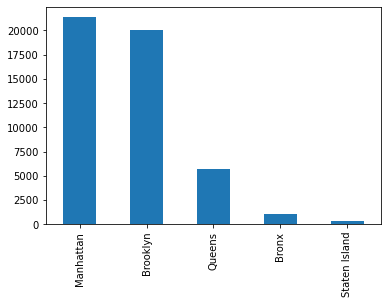

In [15]:
data1['neighbourhood_group'].value_counts().plot(kind = "bar")

In [16]:
# plt.figure(figsize=(15,15))
# nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
# plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
# sns.scatterplot(x=data1['longitude'], y=data1['latitude'], hue='neighbourhood_group',s=20, data=data1)
# plt.legend()
# plt.show()

D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

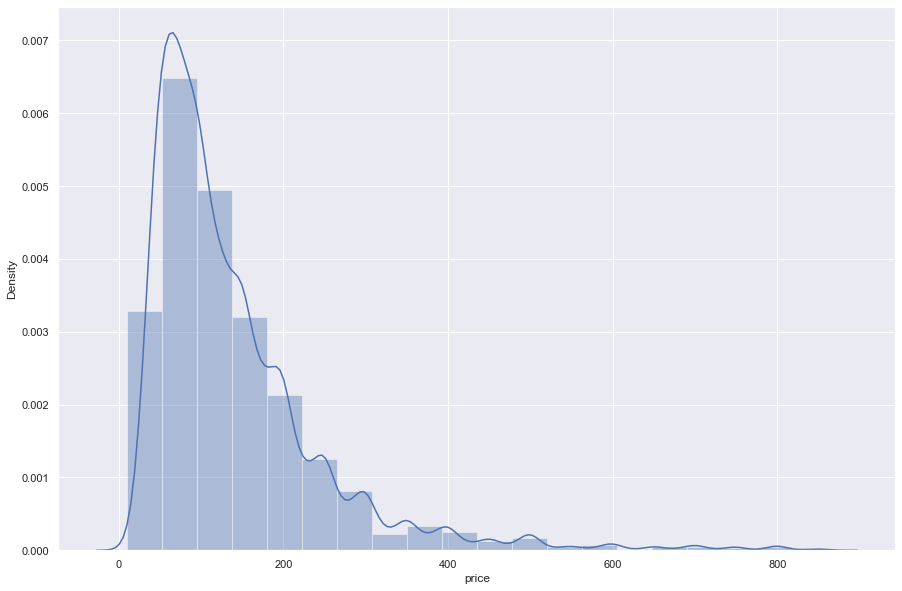

In [20]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(data1['price'],kde_kws={"label": 'price'}, bins=20)

D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

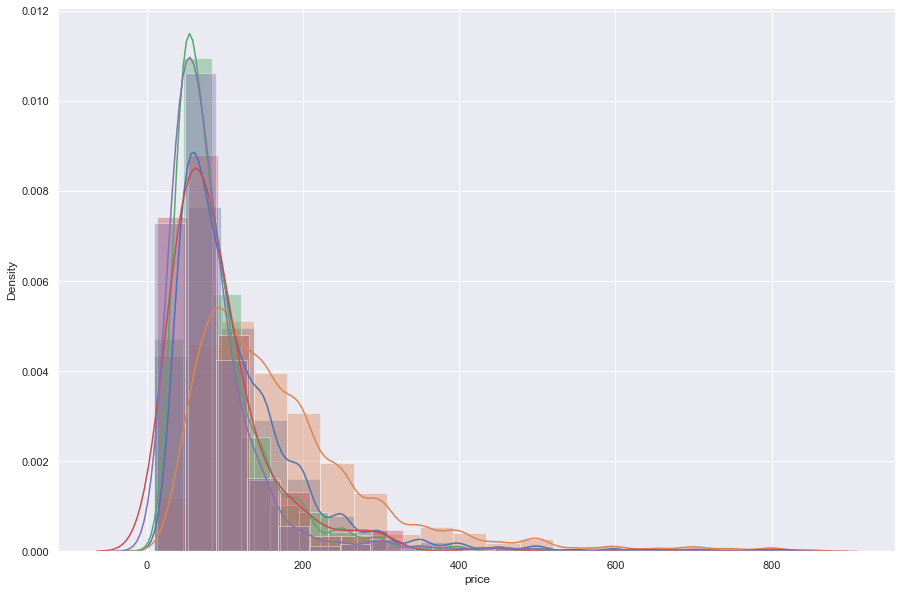

In [21]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in data1.neighbourhood_group.unique():
    sns.distplot(data1.price[data1['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

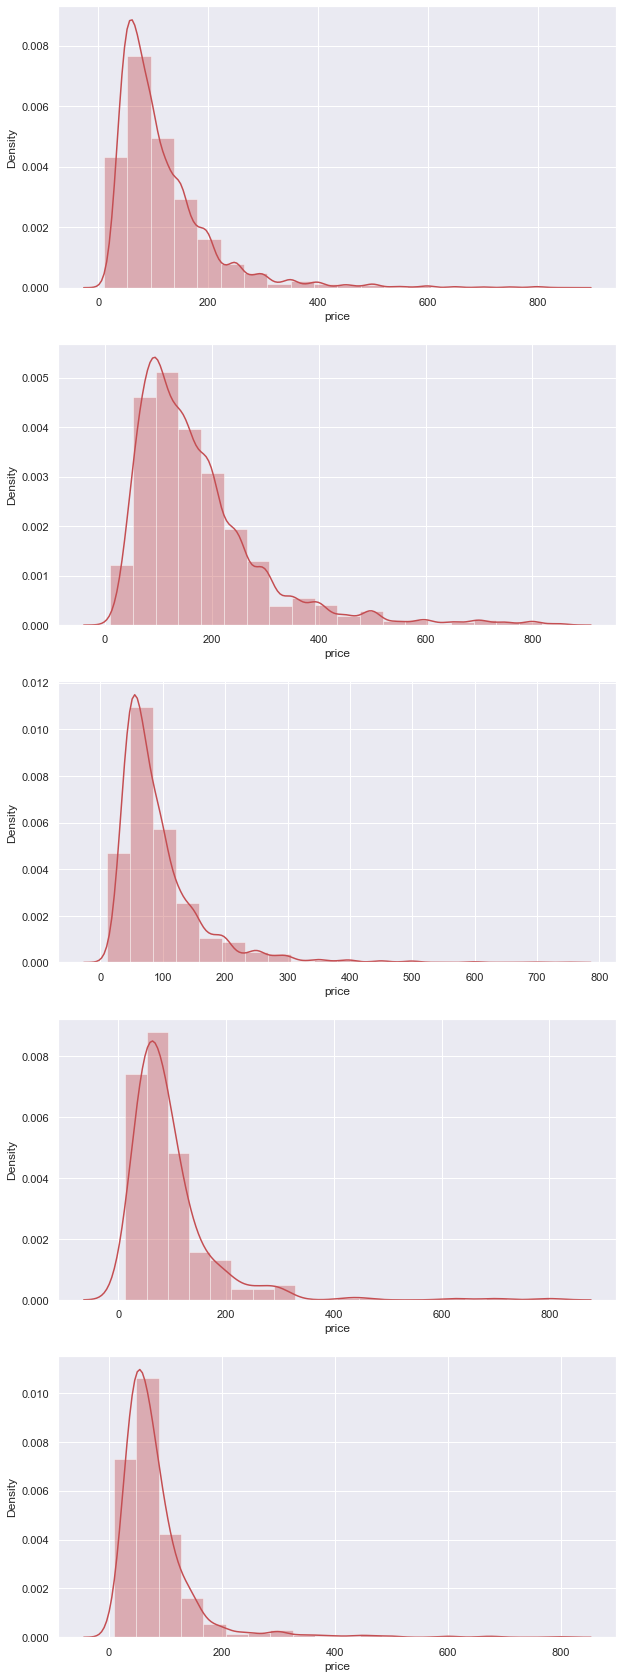

In [22]:
f = plt.figure(figsize=(10,30))
for i, groups in enumerate(data1.neighbourhood_group.unique()):
    f.add_subplot(5, 1, i+1)
    sns.distplot(data1.price[data1['neighbourhood_group']==groups],color="r" ,kde_kws={"label": groups}, bins=20)

In [23]:
data1['price_log_e'] = np.log(data1['price'])
data1.head(5)

<ipython-input-23-4354674acd80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['price_log_e'] = np.log(data1['price'])


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17,price_log_e
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,0.0,0.0,5.003946
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,0.0,0.0,5.416100
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NotReviewed,0.00,1,365,0.0,0.0,5.010635
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,0.0,0.0,4.488636
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,0.0,0.0,4.382027


D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_log_e', ylabel='Density'>

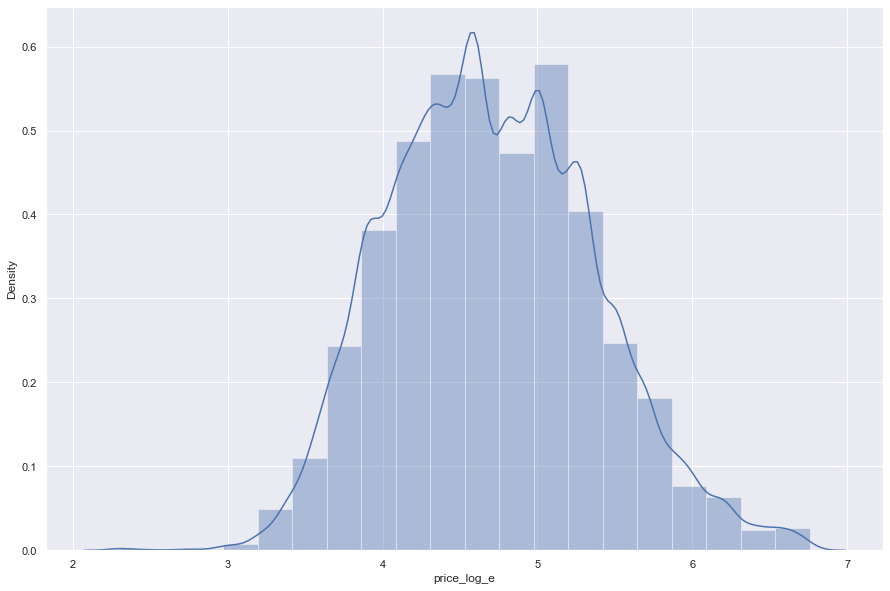

In [24]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(data1['price_log_e'],kde_kws={"label": 'price in log e'}, bins=20)

In [25]:
stats.normaltest(data1["price_log_e"])

NormaltestResult(statistic=562.3974954306634, pvalue=7.532437713364285e-123)

In [26]:
data1['price_log_10'] = np.log10(data1['price'])
data1.head(5)

<ipython-input-26-ebe5c03058ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['price_log_10'] = np.log10(data1['price'])


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17,price_log_e,price_log_10
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,0.0,0.0,5.003946,2.173186
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,0.0,0.0,5.416100,2.352183
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NotReviewed,0.00,1,365,0.0,0.0,5.010635,2.176091
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,0.0,0.0,4.488636,1.949390
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,0.0,0.0,4.382027,1.903090


D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_log_10', ylabel='Density'>

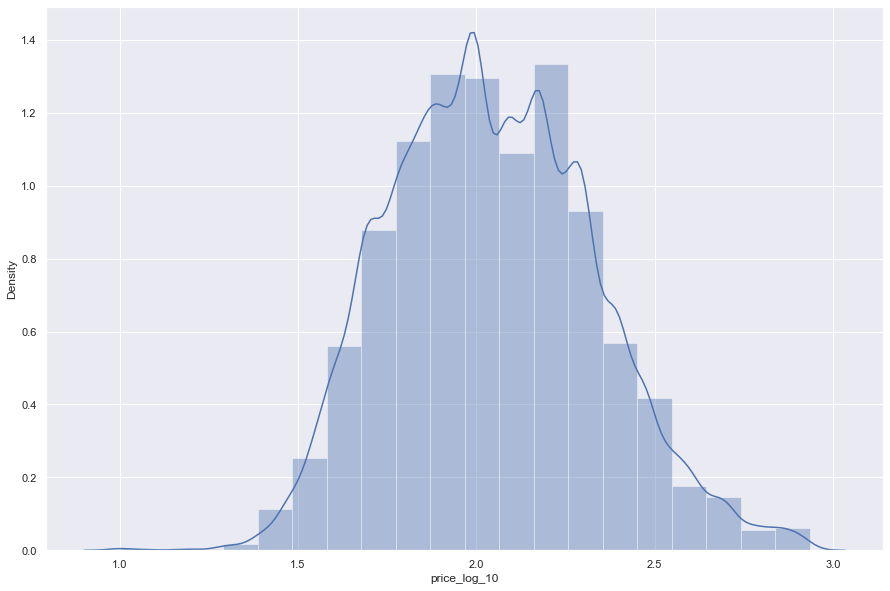

In [27]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(data1['price_log_10'],kde_kws={"label": 'price in log 10'}, bins=20)

In [28]:
stats.normaltest(data1["price_log_10"])

NormaltestResult(statistic=562.3974954306705, pvalue=7.532437713337645e-123)

D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

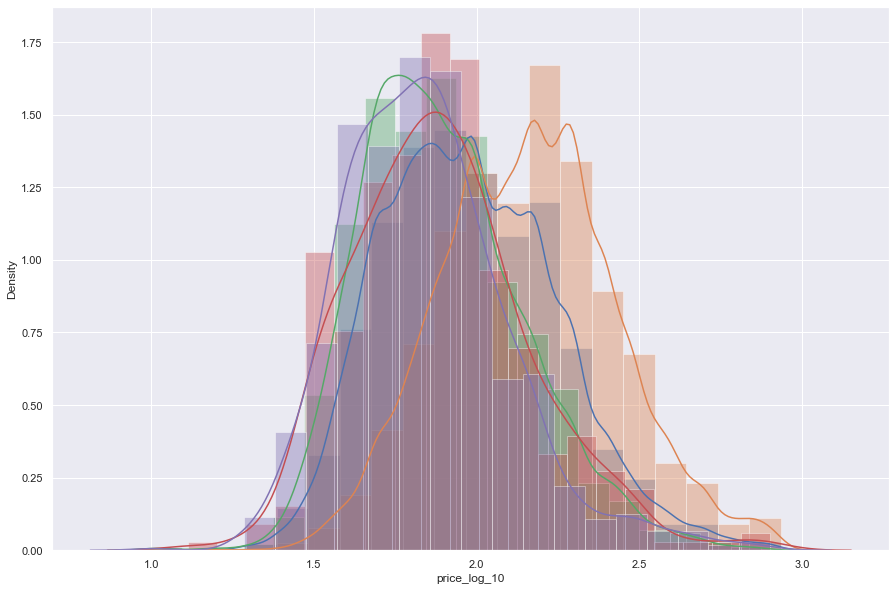

In [29]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in data1.neighbourhood_group.unique():
    sns.distplot(data1.price_log_10[data1['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Test for Normal Distribution for  Brooklyn
------------------------------------------
NormaltestResult(statistic=562.3974954306705, pvalue=7.532437713337645e-123)
------------------------------------------
Test for Normal Distribution for 

D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 Manhattan
------------------------------------------
NormaltestResult(statistic=562.3974954306705, pvalue=7.532437713337645e-123)
------------------------------------------
Test for Normal Distribution for  Queens
------------------------------------------
NormaltestResult(statistic=562.3974954306705, pvalue=7.532437713337645e-123)
------------------------------------------
Test for Normal Distribution for 

D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 Staten Island
------------------------------------------
NormaltestResult(statistic=562.3974954306705, pvalue=7.532437713337645e-123)
------------------------------------------
Test for Normal Distribution for  Bronx
------------------------------------------
NormaltestResult(statistic=562.3974954306705, pvalue=7.532437713337645e-123)
------------------------------------------


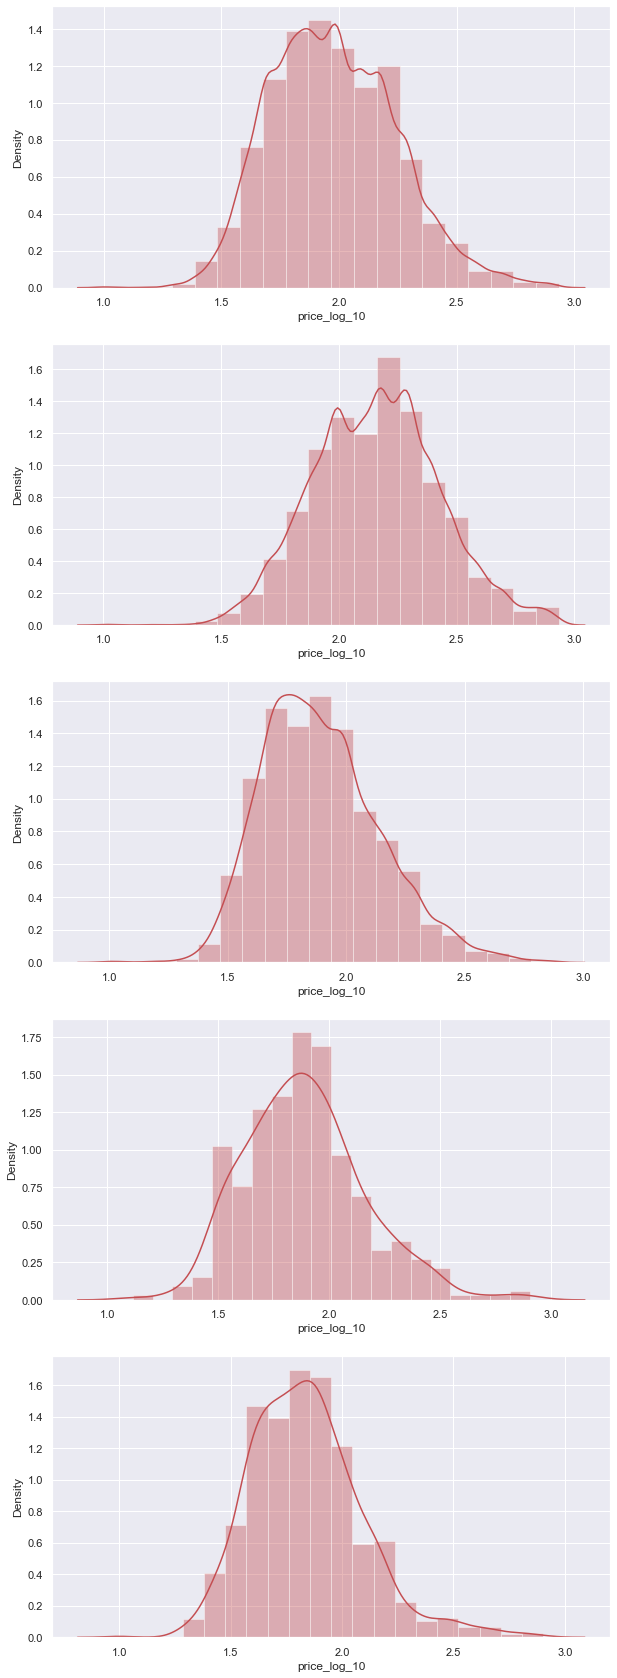

In [30]:
f = plt.figure(figsize=(10,30))
for i, groups in enumerate(data1.neighbourhood_group.unique()):
    f.add_subplot(5, 1, i+1)
    sns.distplot(data1.price_log_10[data1['neighbourhood_group']==groups],color="r" ,kde_kws={"label": groups}, bins=20)
    print('Test for Normal Distribution for ' , groups)
    print('------------------------------------------')
    print(stats.normaltest(data1["price_log_10"]))
    print('------------------------------------------')

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price_log_10'>

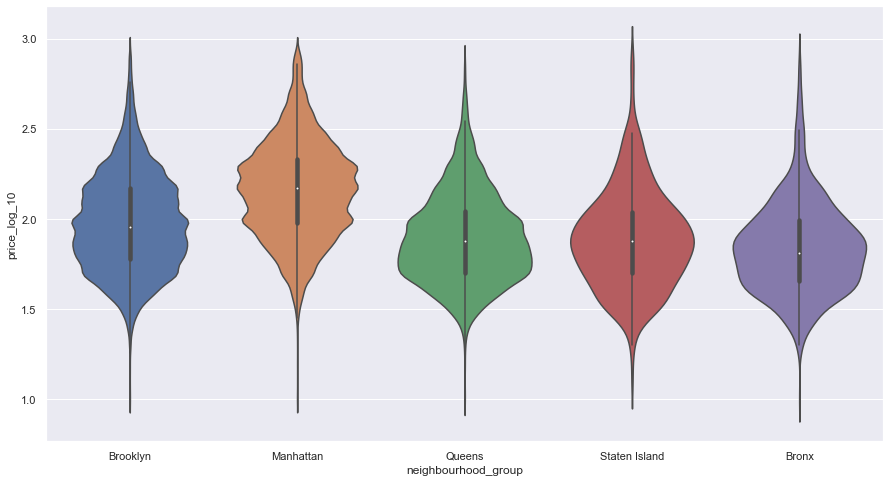

In [33]:
plt.figure(figsize=(15,8))
sns.violinplot("neighbourhood_group", "price_log_10", data=data1)

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price_log_10'>

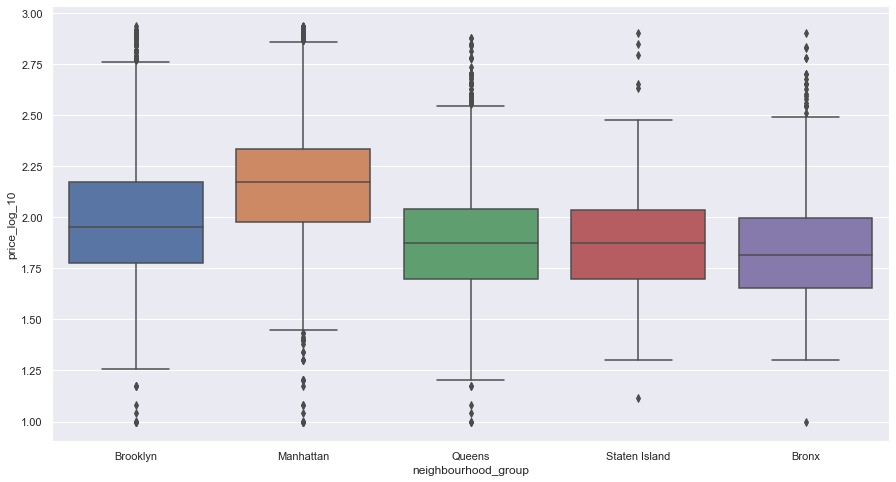

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot("neighbourhood_group", "price_log_10", data=data1)

In [35]:
fstat, pval = stats.f_oneway(*[data1.price_log_10[data1.neighbourhood_group == s]
for s in data1.neighbourhood_group.unique()])
print("Oneway Anova log10(price) ~ neighbourhood_group F=%.2f, p-value=%E" % (fstat, pval))

Oneway Anova log10(price) ~ neighbourhood_group F=1926.63, p-value=0.000000E+00


In [36]:
data1[["neighbourhood_group",'price']].groupby("neighbourhood_group").describe()

price                                             \
                       count        mean         std   min   25%    50%   
neighbourhood_group                                                       
Bronx                 1088.0   84.521140   72.677670  10.0  45.0   65.0   
Brooklyn             20011.0  116.576783   88.430146  10.0  60.0   90.0   
Manhattan            21377.0  174.867942  121.627249  10.0  95.0  149.0   
Queens                5650.0   94.104779   69.190842  10.0  50.0   75.0   
Staten Island          370.0   96.148649   84.022175  13.0  50.0   75.0   

                                   
                       75%    max  
neighbourhood_group                
Bronx                 99.0  800.0  
Brooklyn             149.0  860.0  
Manhattan            215.0  860.0  
Queens               110.0  750.0  
Staten Island        109.0  800.0

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='price_log_10'>

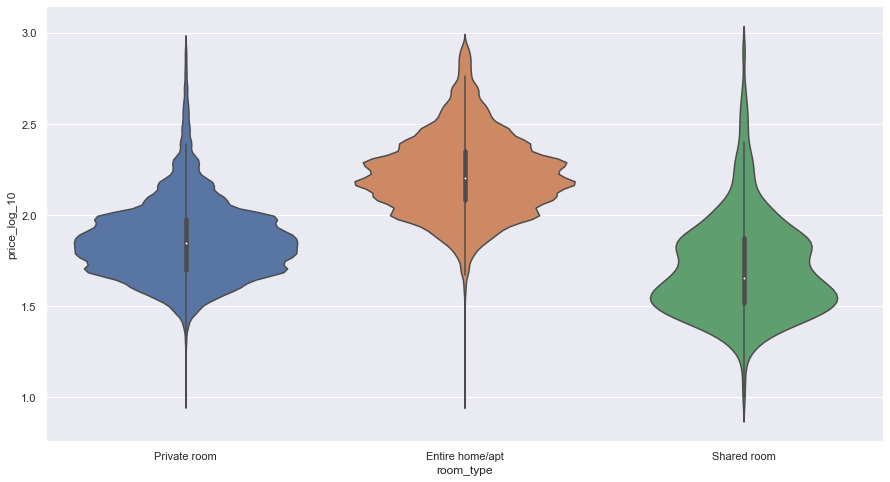

In [37]:
plt.figure(figsize=(15,8))
sns.violinplot("room_type", "price_log_10", data=data1)

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='price_log_10'>

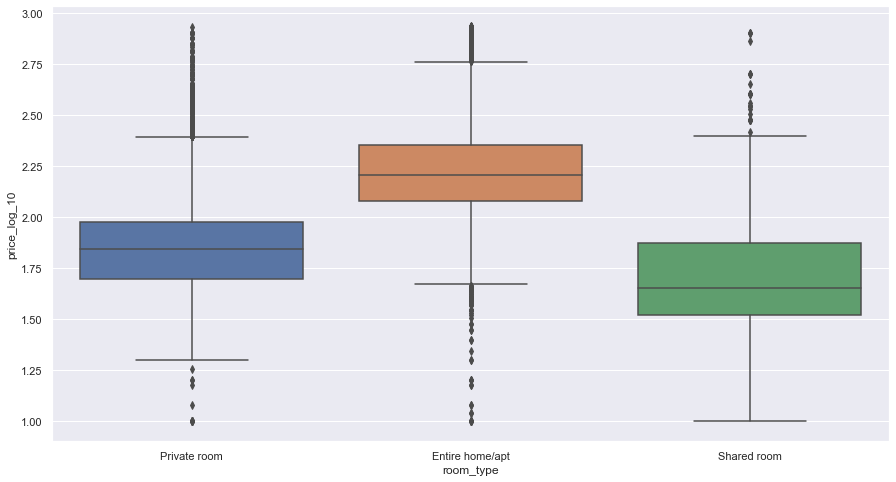

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot("room_type", "price_log_10", data=data1)

In [39]:
fstat, pval = stats.f_oneway(*[data1.price_log_10[data1.room_type == s]
for s in data1.room_type.unique()])
print("Oneway Anova log10(price) ~ room_type F=%.2f, p-value=%E" % (fstat, pval))

Oneway Anova log10(price) ~ room_type F=17381.79, p-value=0.000000E+00


In [40]:
room = data1.groupby('room_type')['id'].agg(['count'])
room.head()

,count
room_type,
Entire home/apt,25100
Private room,22242
Shared room,1154


In [41]:
room.reset_index(level=0, inplace=True)
room.head()

,room_type,count
0,Entire home/apt,25100
1,Private room,22242
2,Shared room,1154


In [42]:
room = room[['room_type','count']]

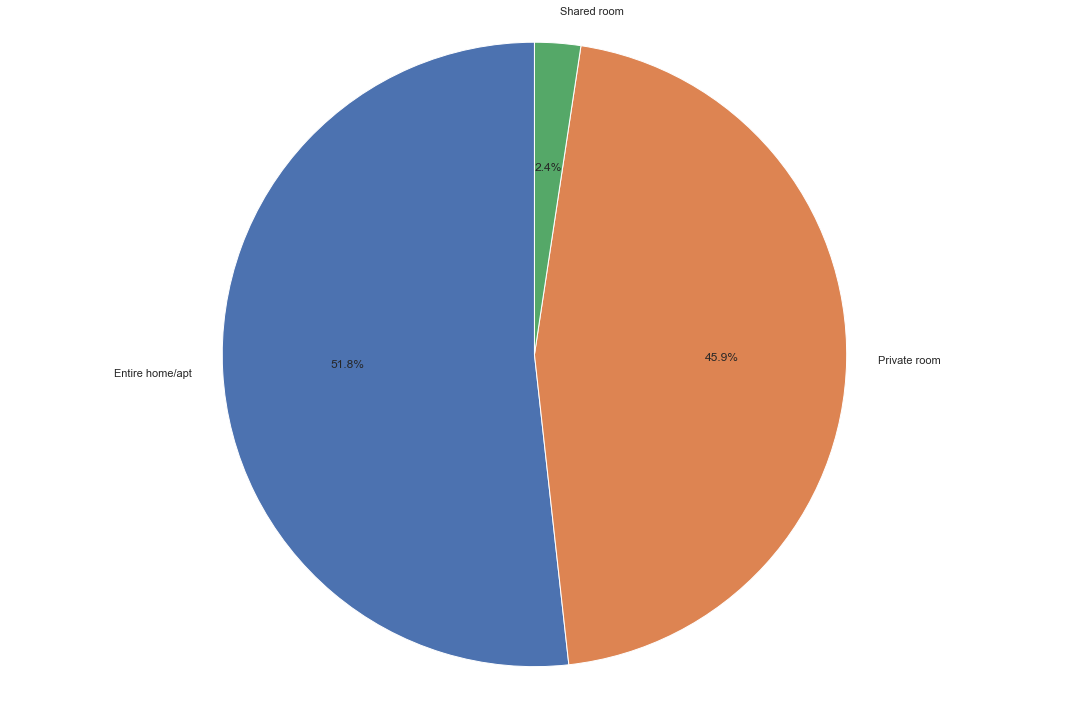

In [43]:
plt.pie(
    room['count'],
    labels=room['room_type'],
    shadow=False,
    startangle=90,
    autopct='%1.1f%%',
    )

plt.axis('equal')

plt.tight_layout()
plt.show()

In [44]:
temp = data1[data1['neighbourhood_group'] == 'Manhattan']
temp['room_type'].value_counts()

Entire home/apt    12965
Private room        7933
Shared room          479
Name: room_type, dtype: int64

In [45]:
# plt.figure(figsize=(15,15))
# nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
# plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
# sns.scatterplot(x=data1['longitude'], y=data1['latitude'], hue='room_type',s=20, data=data1)
# plt.legend()
# plt.show()

<AxesSubplot:xlabel='room_type'>

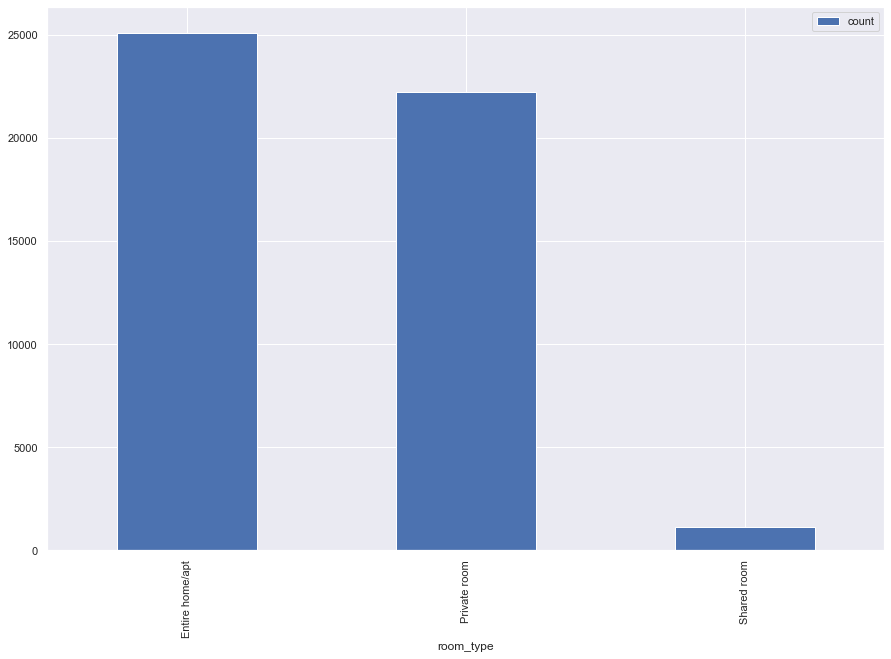

In [46]:
data1.groupby('room_type')['id'].agg(['count']).plot(kind="bar")

In [48]:
data1['availability_365'].dtype

dtype('int64')

In [49]:
#data1['All_year_availability'] = 0
# for i in range(len(data1)):
#     if int(data1.iloc[i, data1.columns.get_loc('availability_365')]) == 365:
#         data1.iloc[i, data1.columns.get_loc('All_year_availability')] = 1
        
def edit(x):
    if x == 365:
        return 1
    else:
        return 0
    
data1['All_year_availability'] = data['availability_365'].apply(edit)
data1['All_year_availability'].head()

<ipython-input-49-800a4d4d0577>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['All_year_availability'] = data['availability_365'].apply(edit)


0    1
1    0
2    1
3    0
4    0
Name: All_year_availability, dtype: int64

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price_log_10'>

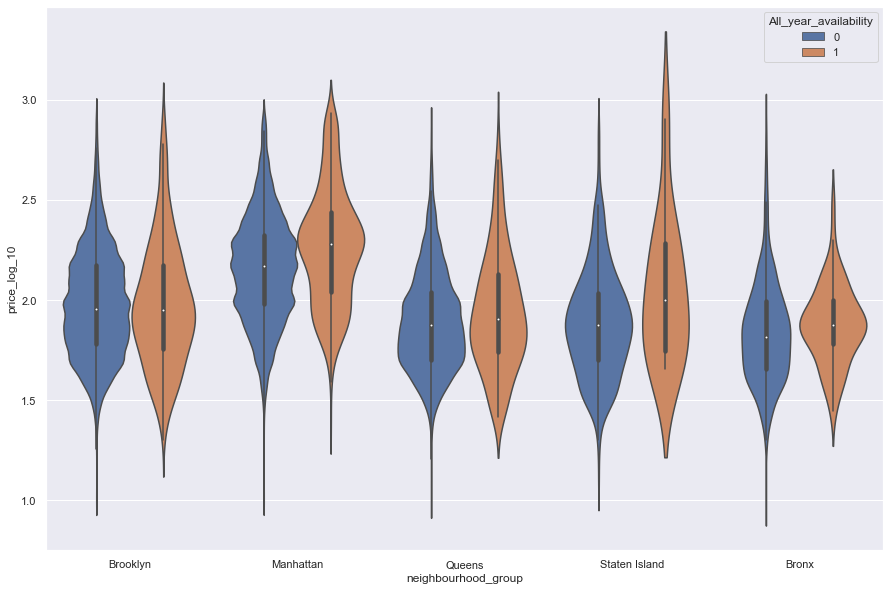

In [50]:
sns.violinplot("neighbourhood_group", "price_log_10", hue="All_year_availability",data=data1)

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price_log_10'>

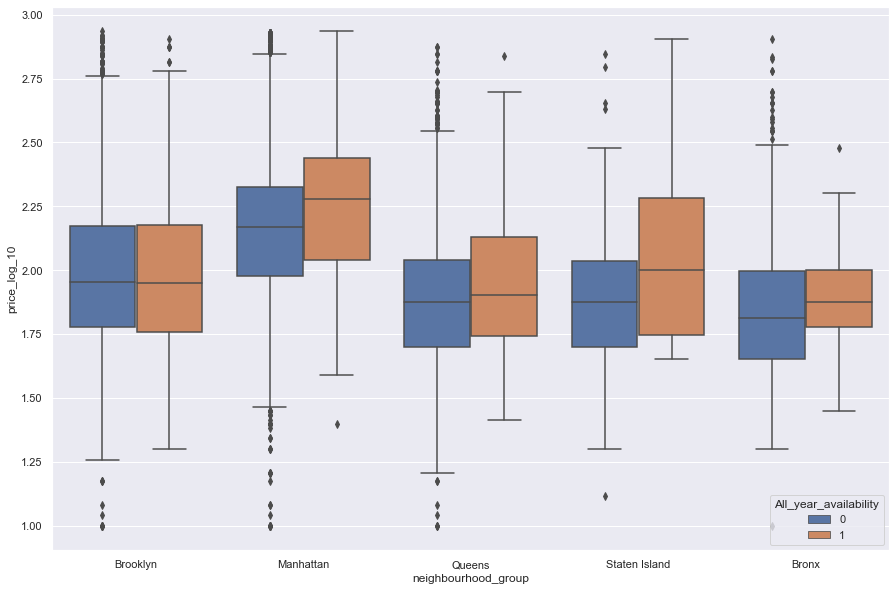

In [51]:


sns.boxplot("neighbourhood_group", "price_log_10", hue="All_year_availability",data=data1)



D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price_log_10'>

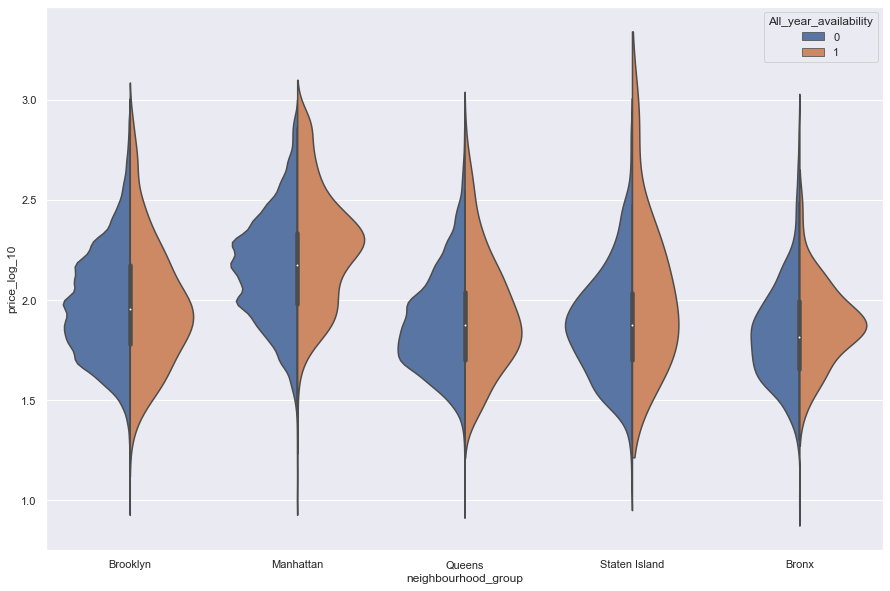

In [52]:
sns.violinplot("neighbourhood_group", "price_log_10", hue="All_year_availability",data=data1 , split=True)

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='All_year_availability', ylabel='price_log_10'>

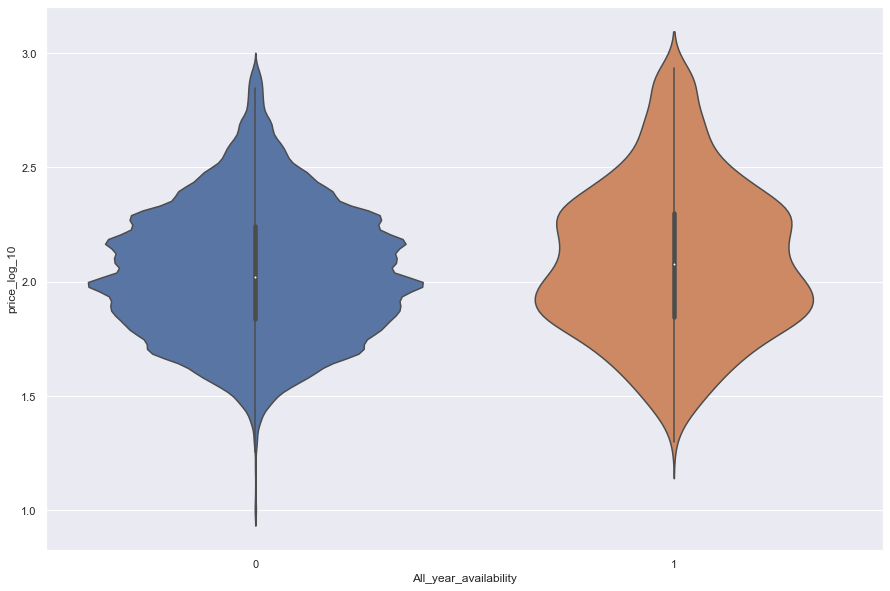

In [53]:
sns.violinplot("All_year_availability", "price_log_10",data=data1)

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='All_year_availability', ylabel='price_log_10'>

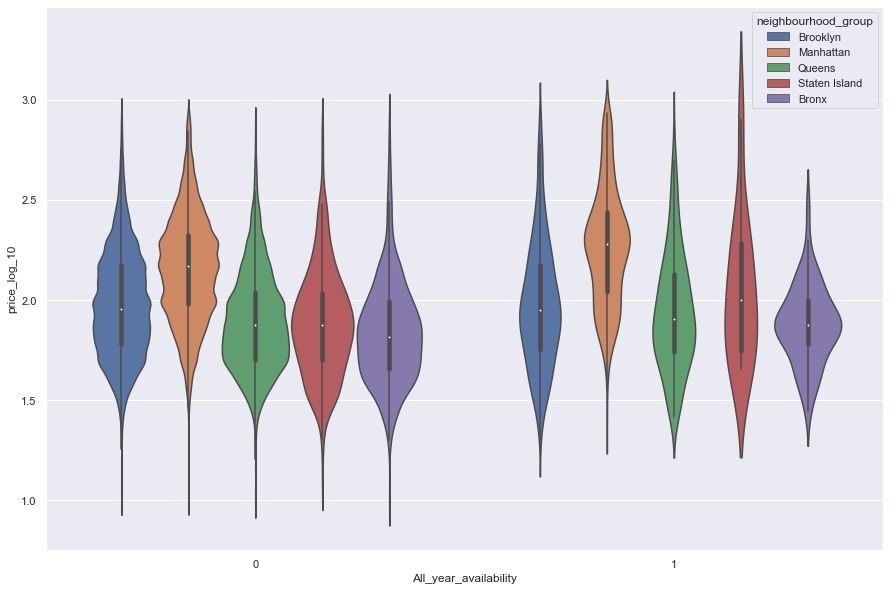

In [54]:
sns.violinplot("All_year_availability", "price_log_10", hue="neighbourhood_group",data=data1)

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='All_year_availability', ylabel='price_log_10'>

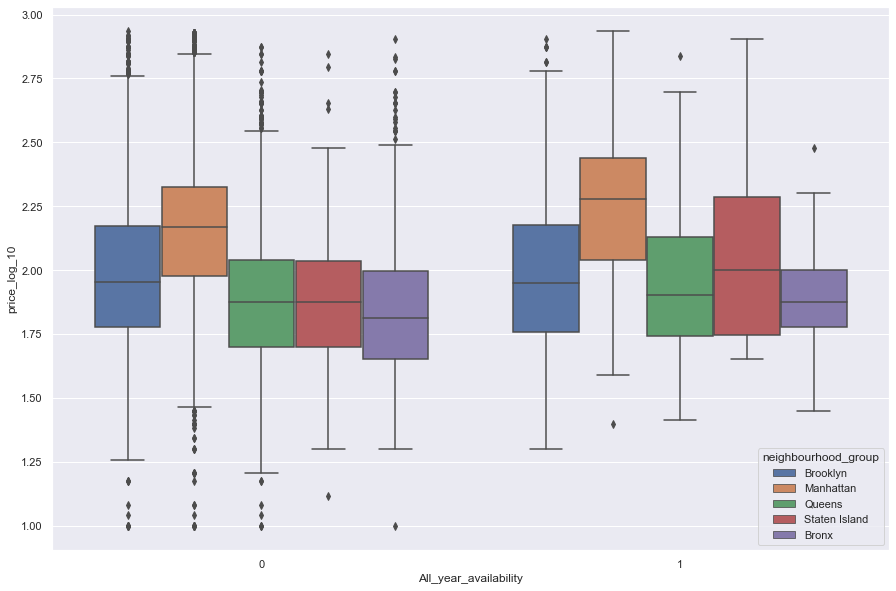

In [55]:
sns.boxplot("All_year_availability", "price_log_10", hue="neighbourhood_group",data=data1)

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='All_year_availability', ylabel='price_log_10'>

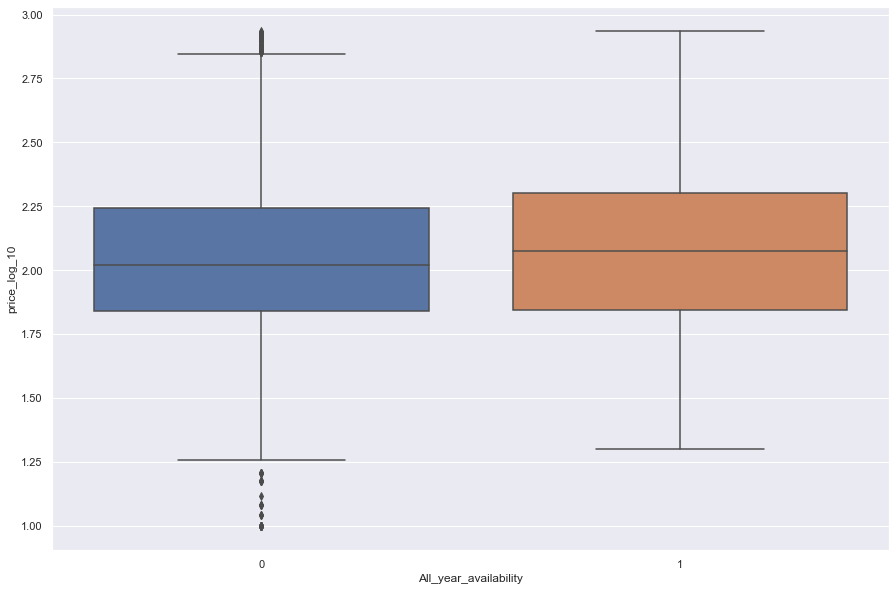

In [56]:
sns.boxplot("All_year_availability", "price_log_10",data=data1)

In [57]:


data1['minimum_nights'].describe()



count    48496.000000
mean         6.979256
std         20.292989
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


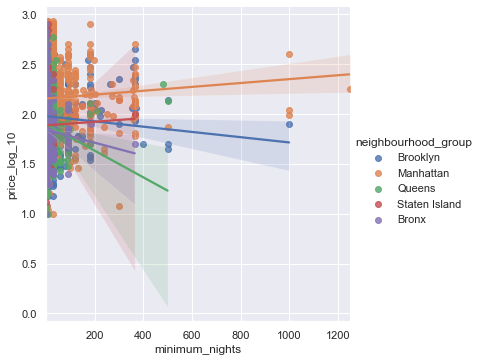

In [58]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lmplot("minimum_nights","price_log_10", hue="neighbourhood_group", data=data1)

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


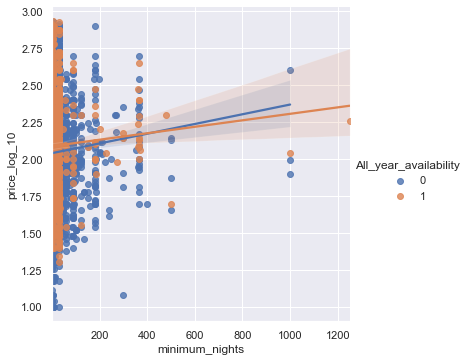

In [59]:
sns.lmplot("minimum_nights", "price_log_10", hue="All_year_availability",data=data1)

In [60]:
data1.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Unnamed: 16                       0
Unnamed: 17                       0
price_log_e                       0
price_log_10                      0
All_year_availability             0
dtype: int64

In [61]:
data1.reviews_per_month.describe()

count    48496.000000
mean         1.095951
std          1.600386
min          0.000000
25%          0.040000
50%          0.380000
75%          1.600000
max         58.500000
Name: reviews_per_month, dtype: float64

In [62]:
temp = data1[data1['reviews_per_month']>0]
temp.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17,price_log_e,price_log_10,All_year_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,9,10/19/2018,0.21,6,365,0.0,0.0,5.003946,2.173186,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,45,5/21/2019,0.38,2,355,0.0,0.0,5.416100,2.352183,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,270,7/5/2019,4.64,1,194,0.0,0.0,4.488636,1.949390,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,9,11/19/2018,0.10,1,0,0.0,0.0,4.382027,1.903090,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,74,6/22/2019,0.59,1,129,0.0,0.0,5.298317,2.301030,0


In [63]:


temp.describe()



,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17,price_log_e,price_log_10,All_year_availability
count,3.863700e+04,3.863700e+04,38637.000000,38637.000000,38637.000000,38637.000000,38637.000000,38637.000000,38637.000000,38637.000000,38637.0,38637.0,38637.000000,38637.000000,38637.000000
mean,1.809885e+07,6.423962e+07,40.728097,-73.951028,133.982737,5.847840,29.364392,1.375605,5.176411,114.355566,0.0,0.0,4.684235,2.034337,0.020990
std,1.069305e+07,7.588907e+07,0.055058,0.046730,101.159171,17.301728,48.271404,1.682290,26.362879,129.282480,0.0,0.0,0.638155,0.277147,0.143353
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.0,0.0,2.302585,1.000000,0.000000
25%,8.720923e+06,7.050126e+06,40.688600,-73.982370,68.000000,1.000000,3.000000,0.190000,1.000000,0.000000,0.0,0.0,4.219508,1.832509,0.000000
50%,1.887209e+07,2.837867e+07,40.721600,-73.954710,100.000000,2.000000,9.000000,0.720000,1.000000,54.000000,0.0,0.0,4.605170,2.000000,0.000000
75%,2.755942e+07,1.018839e+08,40.763000,-73.934930,169.000000,4.000000,33.000000,2.020000,2.000000,227.000000,0.0,0.0,5.129899,2.227887,0.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,860.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,0.0,0.0,6.756932,2.934498,1.000000


D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='reviews_per_month'>

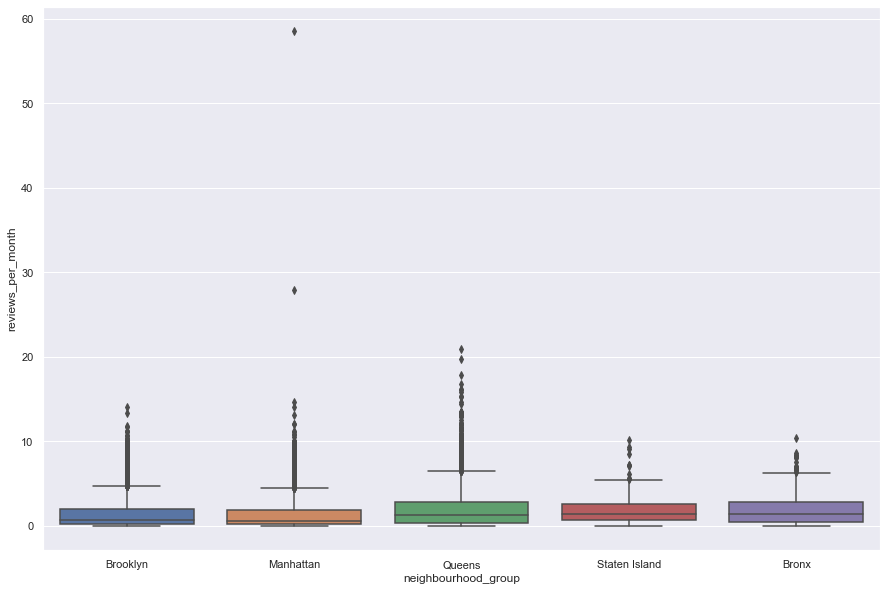

In [64]:
plt.figure(figsize=(15,10))
sns.boxplot("neighbourhood_group", "reviews_per_month", data=temp)

In [65]:


fstat, pval = stats.f_oneway(*[temp.reviews_per_month[temp.neighbourhood_group == s]
for s in temp.neighbourhood_group.unique()])
print("Oneway Anova reviews_per_month ~ neighbourhood_group F=%.2f, p-value=%E" % (fstat, pval))



Oneway Anova reviews_per_month ~ neighbourhood_group F=182.84, p-value=1.674033E-155


<AxesSubplot:>

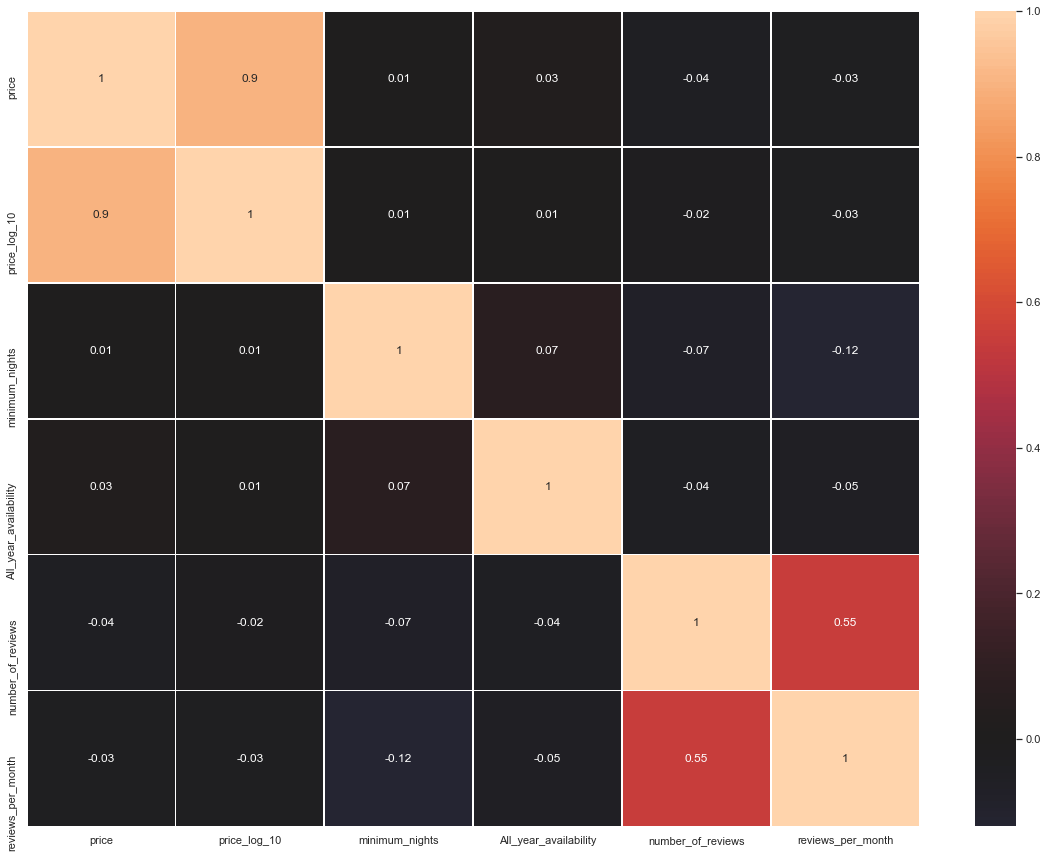

In [66]:
plt.figure(i,figsize=(20,15))
correlation_matrix = temp[["price",'price_log_10',"minimum_nights","All_year_availability","number_of_reviews","reviews_per_month"]].corr().round(2)
sns.heatmap(data=correlation_matrix ,center=0 , linewidths=.7, annot=True)